In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("/kaggle/input/datasets/shelarjaysandeep/titanic-dataset/Titanic Dataset..csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  10 non-null     int64  
 1   Survived     10 non-null     int64  
 2   Pclass       10 non-null     int64  
 3   Name         10 non-null     object 
 4   Sex          10 non-null     object 
 5   Age          9 non-null      float64
 6   SibSp        10 non-null     int64  
 7   Parch        10 non-null     int64  
 8   Fare         10 non-null     float64
 9   Embarked     10 non-null     object 
dtypes: float64(2), int64(5), object(3)
memory usage: 932.0+ bytes


In [10]:
# Fill missing Age safely
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing Embarked safely
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin only if exists
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

# Check again after cleaning
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
# Survival Rate by Gender
df.groupby('Sex')['Survived'].mean()

Sex
female    0.8
male      0.2
Name: Survived, dtype: float64

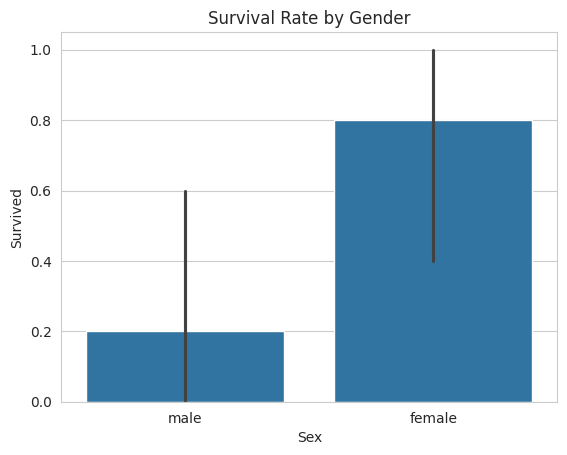

In [12]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

In [13]:
# Survival Rate by Passenger Class
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.666667
2    1.000000
3    0.333333
Name: Survived, dtype: float64

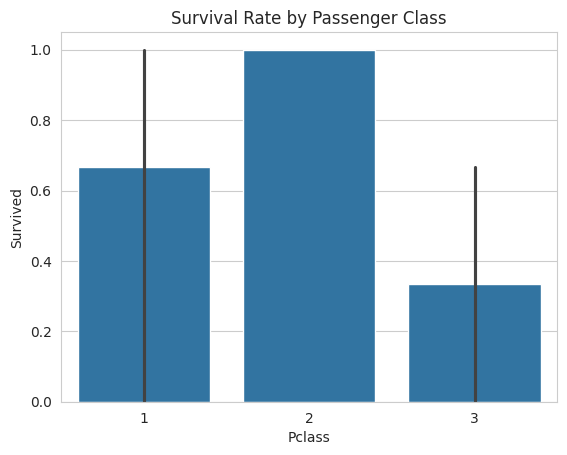

In [14]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

In [16]:
# Create Age Groups
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0,12,20,40,60,80],
                        labels=['Child','Teen','Adult','Middle Age','Senior'])

# Add observed=False to avoid warning
df.groupby('AgeGroup', observed=False)['Survived'].mean()

AgeGroup
Child         1.000000
Teen          0.000000
Adult         0.571429
Middle Age    0.000000
Senior             NaN
Name: Survived, dtype: float64

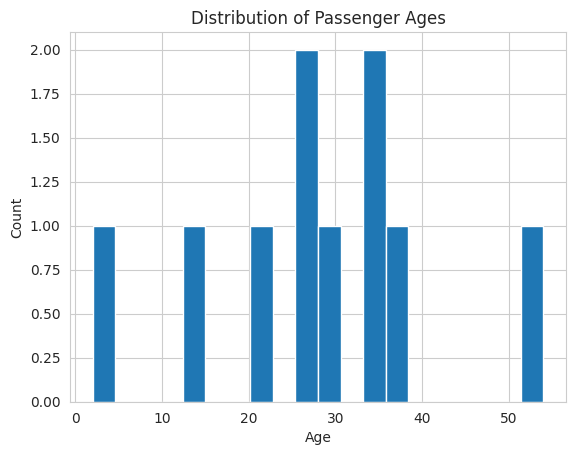

In [17]:
plt.hist(df['Age'], bins=20)
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

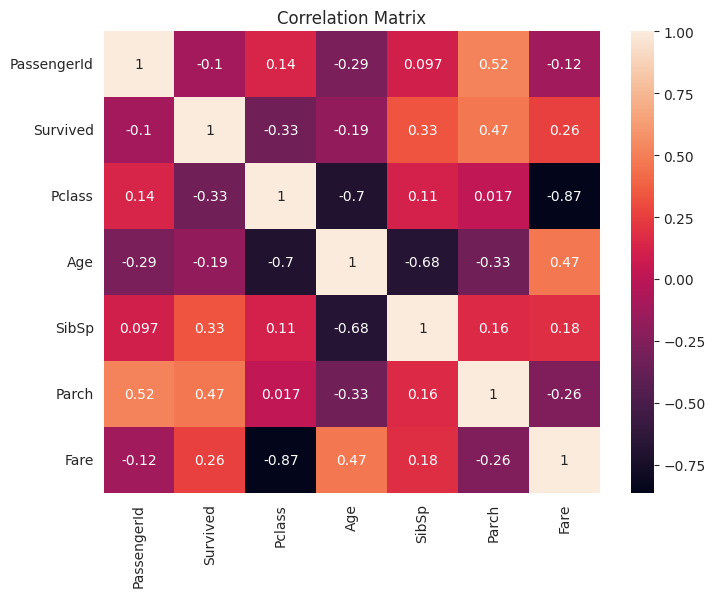

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()